In [1]:
# paraPropPython example use of paraPropPython.py notebook
# s. prohira, c. sbrocco

%matplotlib inline
import paraPropPython as ppp
import numpy as np
import matplotlib.pyplot as plt
import util as util


In [2]:
##### steady state example #####

### first, initialize an instance of paraProp by defining its dimensions and frequency of interest ###
iceDepth = 200. # m
iceLength = 600. # m
dx = 1 # m
dz = 0.05 # m

freq = 0.15

### it is useful to set the reference depth as the source depth when you only have one transmitter ###
sourceDepth = 10. # m
sim = ppp.paraProp(iceLength, iceDepth, dx, dz, refDepth=sourceDepth)

### useful arrays for plottinng ###
z = sim.get_z()
x = sim.get_x()

/home/ar1sh/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


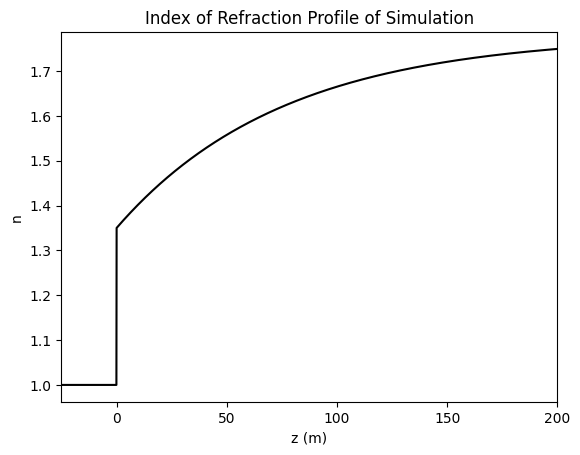

In [3]:
### NOTE: define n before defining source ###

### an example of defining n as a function of z (also can be done using a vector, see implementation) ###
def southpole(z):
    A=1.78
    B=-0.43
    C=-0.0132
    return A+B*np.exp(C*z)
sim.set_n(nFunc=southpole)

### plot ###
plt.plot(z, sim.get_n()[:,0], color='black')
plt.ylabel('n')
plt.xlabel('z (m)')
plt.title('Index of Refraction Profile of Simulation')
plt.xlim(z[0], z[-1])

plt.show()

/home/ar1sh/paraPropPython/paraPropPython.py:338: ComplexWarning: Casting complex values to real discards the imaginary part
  nPoints = int((centerLmbda0/2) / self.dz)


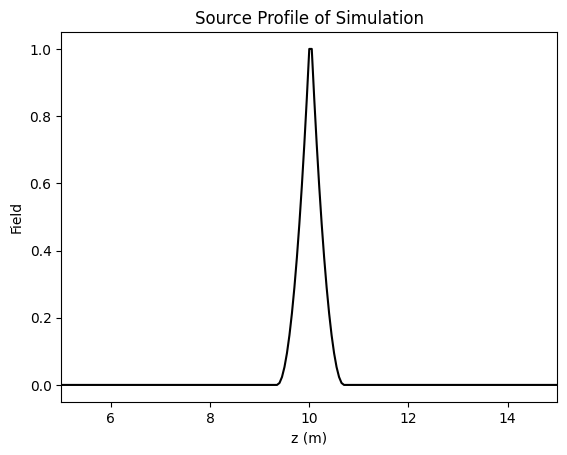

In [4]:
### an example of defining the source as a dipole ###
### (also can be done using a vector or function like n, see implementation) ###
sim.set_dipole_source_profile(freq, sourceDepth)

### plot, zoomed in ###
plt.plot(z, abs(sim.get_source_profile()), color='black')
plt.ylabel('Field')
plt.xlabel('z (m)')
plt.title('Source Profile of Simulation')
plt.xlim(sourceDepth - 5, sourceDepth + 5)
plt.show()


### set a cw signal ###
sim.set_cw_source_signal(freq)

In [5]:
### run the solver ###
sim.do_solver()

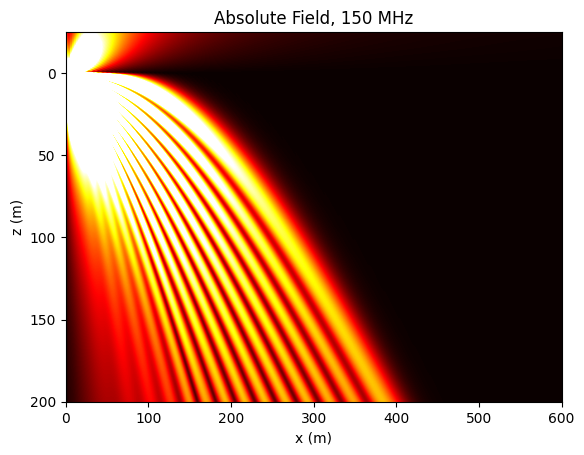

In [6]:
### plot absolute value of field for whole simulation space ###
fig = plt.figure()
ax = fig.add_subplot(111)

plt.imshow(np.transpose(abs(sim.get_field())), aspect='auto', cmap='hot',  vmin=1e-6, vmax=1e-3, 
          extent=(x[0], x[-1], z[-1], z[0]))
plt.title("Absolute Field, " + str(int(freq*1000))+" MHz")
plt.xlabel("x (m)")
plt.ylabel("z (m)")
plt.show()

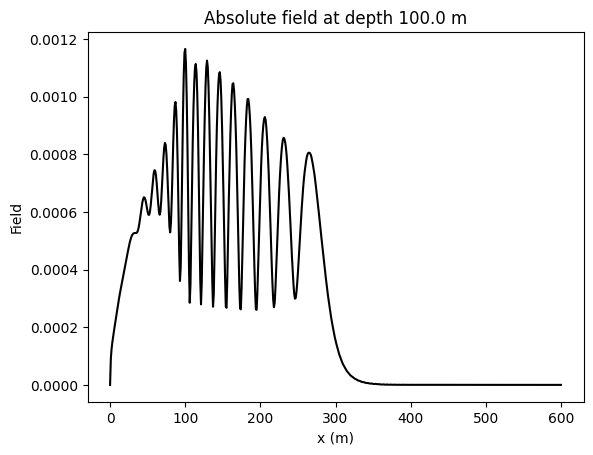

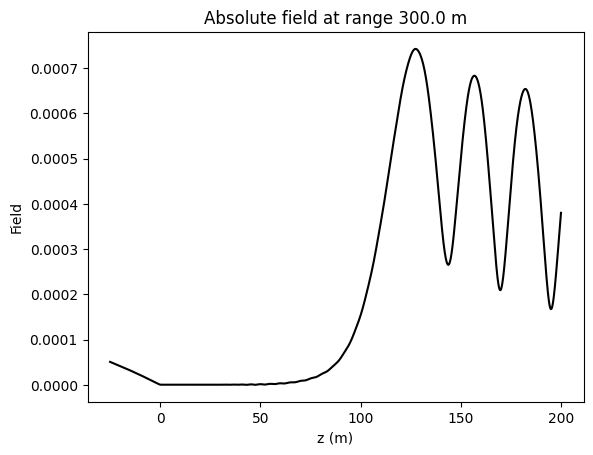

Absolute field at point (x0 = 300.0, z0 = 100.0): 0.00015379801922940146


In [14]:
### plot absolute value of field for horizontal slice of simulation ###
z0 = 100.
plt.plot(x, abs(sim.get_field(z0=z0)), color='black')
plt.xlabel('x (m)')
plt.ylabel('Field')
plt.title("Absolute field at depth " + str(z0) + " m" )
plt.show()

### plot absolute value of field for vertical slice of simulation ###
x0 = 300.
plt.plot(z, abs(sim.get_field(x0=x0)), color='black')
plt.xlabel('z (m)')
plt.ylabel('Field')
plt.title("Absolute field at range " + str(x0) + " m" )
plt.show()

### value of field for at a single point (x0, z0) ###
print("Absolute field at point (x0 = " + str(x0) + ", z0 = " + str(z0) + "): " + str(abs(sim.get_field(x0=x0, z0=z0))))

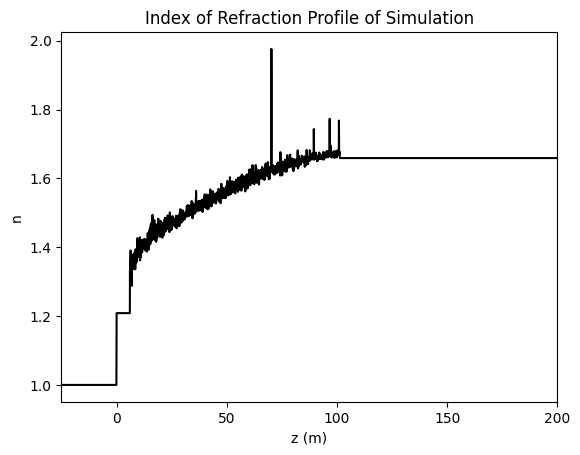

In [10]:
#neem permitivity simulation
data = np.loadtxt("Neem.txt")
depths = data[:, 0]
ref_indices = data[:, 1]
sim.set_n(nVec=ref_indices, zVec=depths)

# Plot the refractive index profile
z = sim.get_z()
plt.plot(z, sim.get_n()[:,0], color='black')
plt.ylabel('n')
plt.xlabel('z (m)')
plt.title('Index of Refraction Profile of Simulation')
plt.xlim(z[0], z[-1])
plt.show()

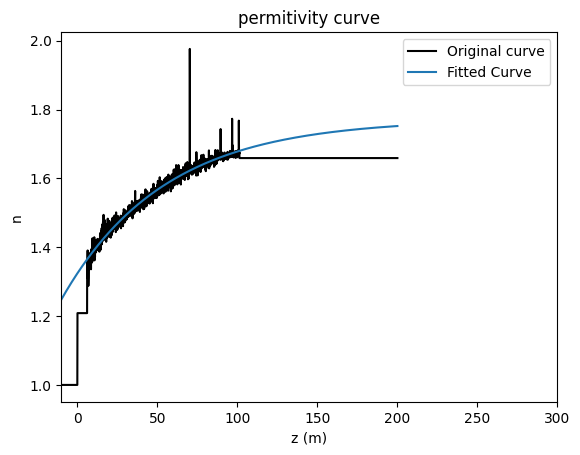

In [5]:
from scipy.optimize import curve_fit

def func(z, a, b, c):
    return a + (b* np.exp(-c* z))

data= np.array(np.loadtxt("Neem.txt"))


depths = data[:, 0]
ref_indices = data[:, 1]
z = sim.get_z()
sim.set_n(nVec=ref_indices, zVec=depths)

f= np.array([1.325,0.463, -0.0140]) #got these numbers from data fit of ice-index of refraction from south pole website
p0= f**2

popt, pcov = curve_fit(func, depths, ref_indices, p0)
z = sim.get_z()


plt.plot(z, sim.get_n()[:,0], color='black', label ="Original curve")
plt.xlim(z[0], z[-1])
plt.ylabel('n')
plt.xlabel('z (m)')



plt.plot(z, func(z, *popt),  label="Fitted Curve")
plt.legend()
plt.ylabel('n')
plt.xlabel('z (m)')
plt.xlim(-10,300)
plt.title("permitivity curve")
plt.show()




In [8]:
sim.do_solver()

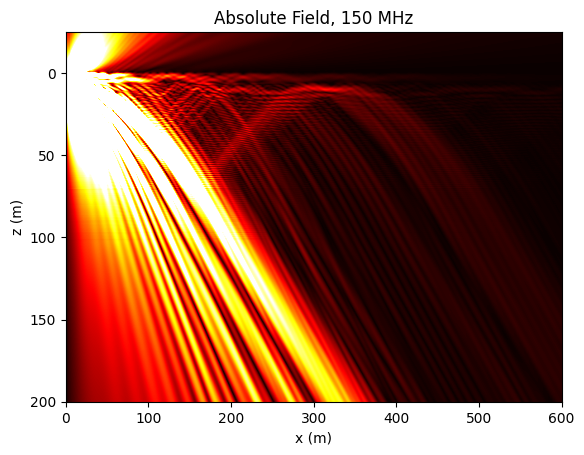

In [9]:
### plot absolute value of field for whole simulation space ###
fig = plt.figure()
ax = fig.add_subplot(111)

plt.imshow(np.transpose(abs(sim.get_field())), aspect='auto', cmap='hot',  vmin=1e-6, vmax=1e-3, 
          extent=(x[0], x[-1], z[-1], z[0]))
plt.title("Absolute Field, " + str(int(freq*1000))+" MHz")
plt.xlabel("x (m)")
plt.ylabel("z (m)")
plt.show()

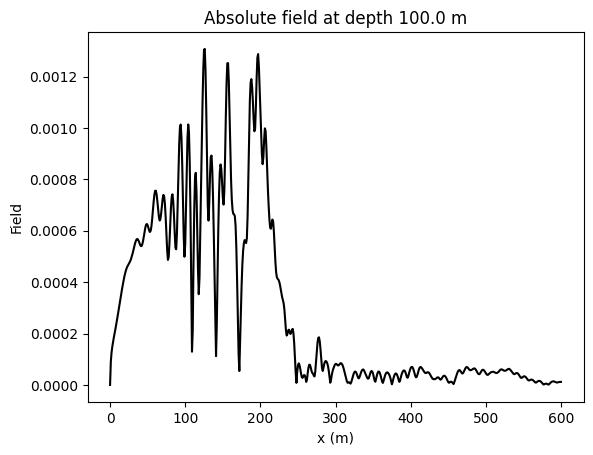

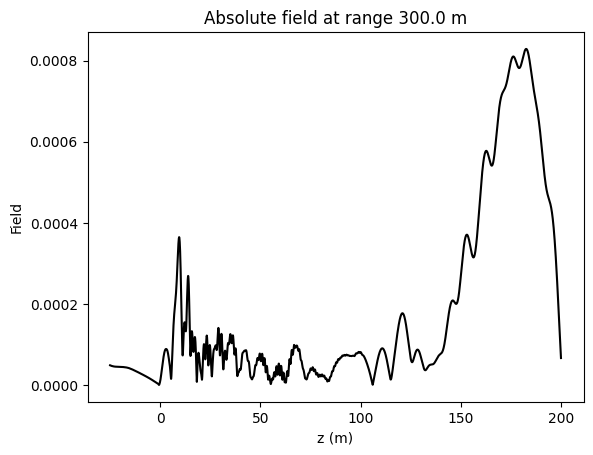

Absolute field at point (x0 = 300.0, z0 = 100.0): 8.163260715614067e-05


In [18]:
### plot absolute value of field for horizontal slice of simulation ###
z0 = 100.
plt.plot(x, abs(sim.get_field(z0=z0)), color='black')
plt.xlabel('x (m)')
plt.ylabel('Field')
plt.title("Absolute field at depth " + str(z0) + " m" )
plt.show()

### plot absolute value of field for vertical slice of simulation ###
x0 = 300.
plt.plot(z, abs(sim.get_field(x0=x0)), color='black')
plt.xlabel('z (m)')
plt.ylabel('Field')
plt.title("Absolute field at range " + str(x0) + " m" )
plt.show()

### value of field for at a single point (x0, z0) ###
print("Absolute field at point (x0 = " + str(x0) + ", z0 = " + str(z0) + "): " + str(abs(sim.get_field(x0=x0, z0=z0))))

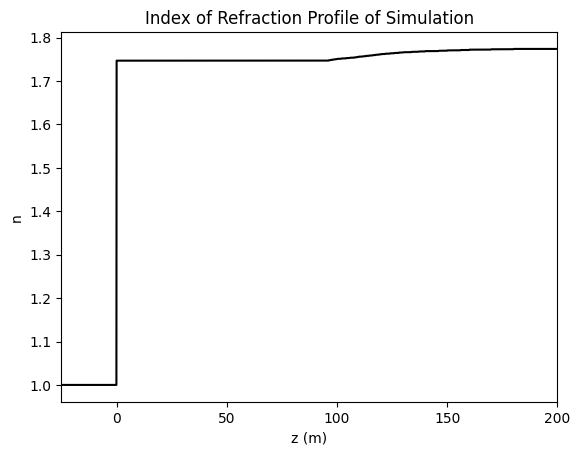

In [19]:
#alley data simulation, 

data = np.loadtxt("adata.txt")
depths = data[:, 0]
ref_indices = data[:, 1]
sim.set_n(nVec=ref_indices, zVec=depths)

# Plot the refractive index profile
z = sim.get_z()
plt.plot(z, sim.get_n()[:,0], color='black')
plt.ylabel('n')
plt.xlabel('z (m)')
plt.title('Index of Refraction Profile of Simulation')
plt.xlim(z[0], z[-1])
plt.show()

In [20]:
sim.do_solver()

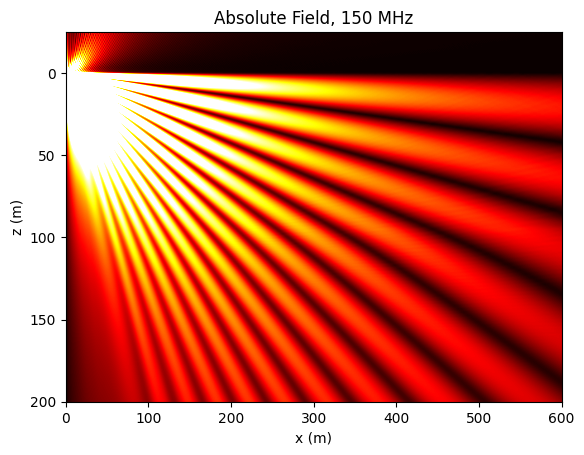

In [21]:
### plot absolute value of field for whole simulation space ###
fig = plt.figure()
ax = fig.add_subplot(111)

plt.imshow(np.transpose(abs(sim.get_field())), aspect='auto', cmap='hot',  vmin=1e-6, vmax=1e-3, 
          extent=(x[0], x[-1], z[-1], z[0]))
plt.title("Absolute Field, " + str(int(freq*1000))+" MHz")
plt.xlabel("x (m)")
plt.ylabel("z (m)")
plt.show()

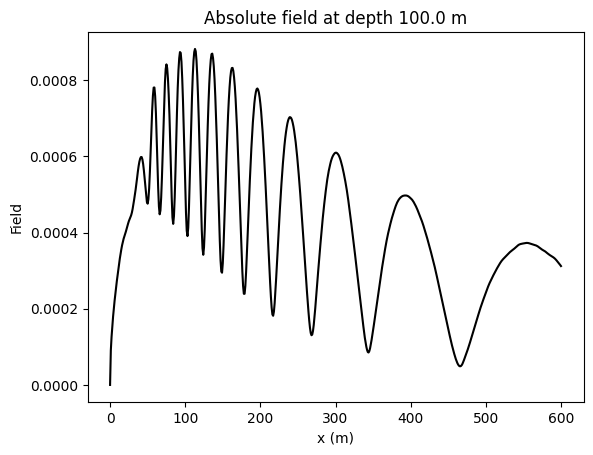

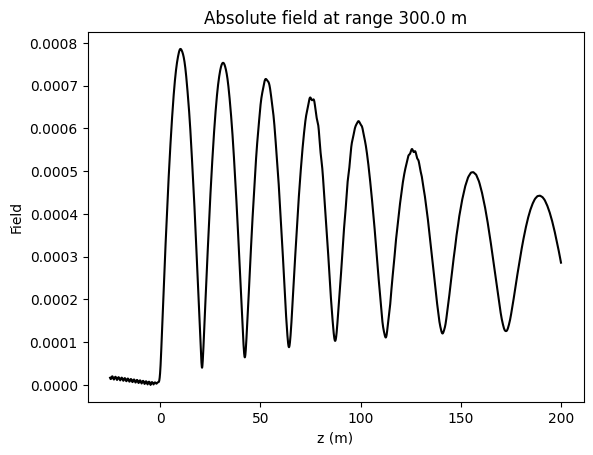

Absolute field at point (x0 = 300.0, z0 = 100.0): 0.0006094683491022585


In [22]:
### plot absolute value of field for horizontal slice of simulation ###
z0 = 100.
plt.plot(x, abs(sim.get_field(z0=z0)), color='black')
plt.xlabel('x (m)')
plt.ylabel('Field')
plt.title("Absolute field at depth " + str(z0) + " m" )
plt.show()

### plot absolute value of field for vertical slice of simulation ###
x0 = 300.
plt.plot(z, abs(sim.get_field(x0=x0)), color='black')
plt.xlabel('z (m)')
plt.ylabel('Field')
plt.title("Absolute field at range " + str(x0) + " m" )
plt.show()

### value of field for at a single point (x0, z0) ###
print("Absolute field at point (x0 = " + str(x0) + ", z0 = " + str(z0) + "): " + str(abs(sim.get_field(x0=x0, z0=z0))))

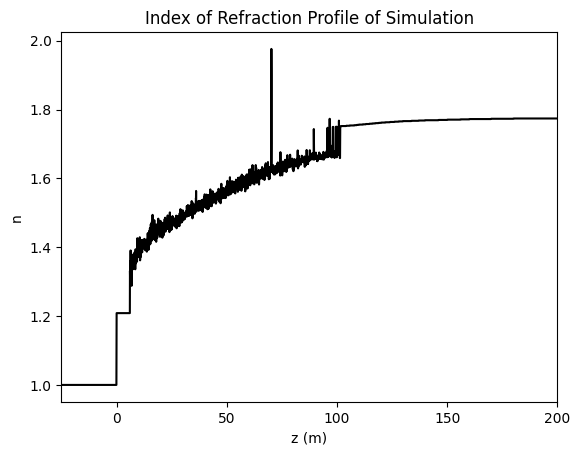

In [23]:
#neem and alley combined simulation, looks pretty similar to neem simulation
data = np.loadtxt("alleyNeem.txt")
depths = data[:, 0]
ref_indices = data[:, 1]
sim.set_n(nVec=ref_indices, zVec=depths)

# Plot the refractive index profile
z = sim.get_z()
plt.plot(z, sim.get_n()[:,0], color='black')
plt.ylabel('n')
plt.xlabel('z (m)')
plt.title('Index of Refraction Profile of Simulation')
plt.xlim(z[0], z[-1])
plt.show()

In [24]:
sim.do_solver()

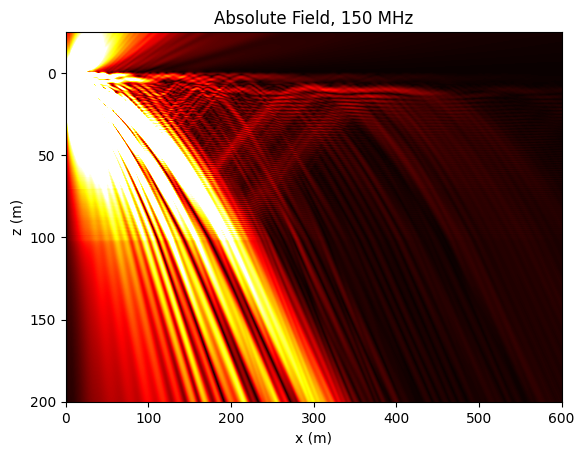

In [25]:
### plot absolute value of field for whole simulation space ###
fig = plt.figure()
ax = fig.add_subplot(111)

plt.imshow(np.transpose(abs(sim.get_field())), aspect='auto', cmap='hot',  vmin=1e-6, vmax=1e-3, 
          extent=(x[0], x[-1], z[-1], z[0]))
plt.title("Absolute Field, " + str(int(freq*1000))+" MHz")
plt.xlabel("x (m)")
plt.ylabel("z (m)")
plt.show()

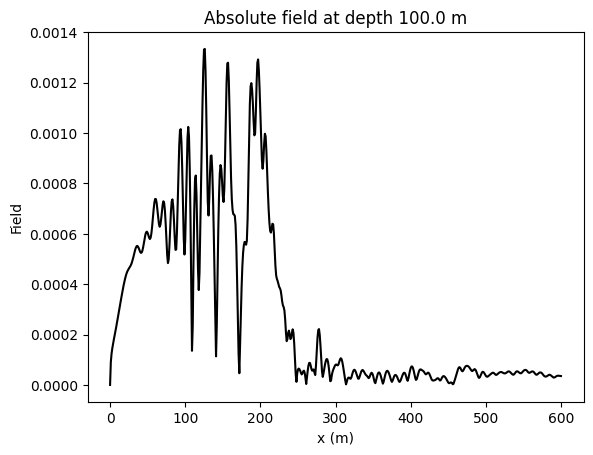

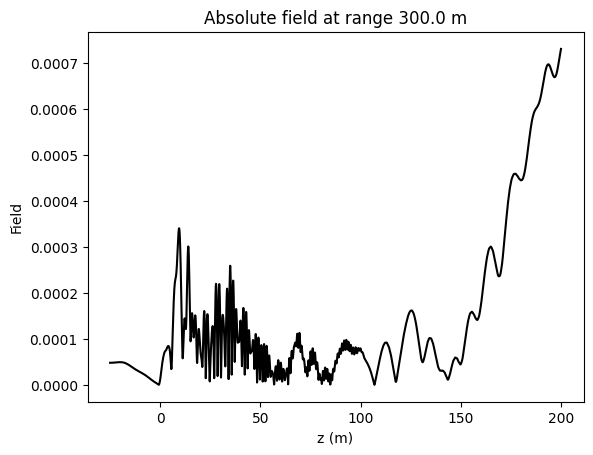

Absolute field at point (x0 = 300.0, z0 = 100.0): 8.010063443024342e-05


In [26]:
### plot absolute value of field for horizontal slice of simulation ###
z0 = 100.
plt.plot(x, abs(sim.get_field(z0=z0)), color='black')
plt.xlabel('x (m)')
plt.ylabel('Field')
plt.title("Absolute field at depth " + str(z0) + " m" )
plt.show()

### plot absolute value of field for vertical slice of simulation ###
x0 = 300.
plt.plot(z, abs(sim.get_field(x0=x0)), color='black')
plt.xlabel('z (m)')
plt.ylabel('Field')
plt.title("Absolute field at range " + str(x0) + " m" )
plt.show()

### value of field for at a single point (x0, z0) ###
print("Absolute field at point (x0 = " + str(x0) + ", z0 = " + str(z0) + "): " + str(abs(sim.get_field(x0=x0, z0=z0))))

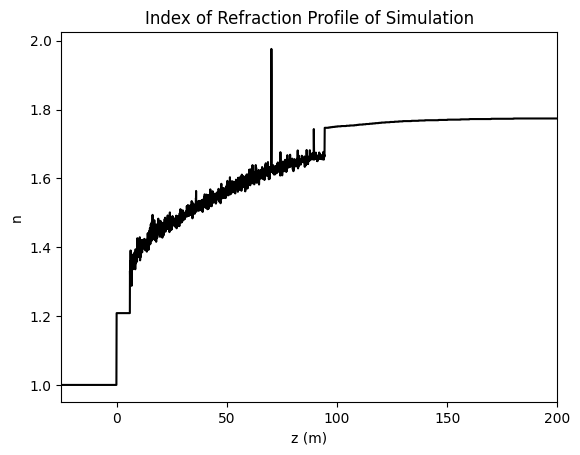

In [46]:
#neem and alley simulation with simulation starting with beginning of Neem going till end of alley
data = np.loadtxt("Neema.txt")
depths = data[:, 0]
ref_indices = data[:, 1]
sim.set_n(nVec=ref_indices, zVec=depths)

# Plot the refractive index profile
z = sim.get_z()
plt.plot(z, sim.get_n()[:,0], color='black')
plt.ylabel('n')
plt.xlabel('z (m)')
plt.title('Index of Refraction Profile of Simulation')
plt.xlim(z[0], z[-1])
plt.show()

In [47]:
sim.do_solver()

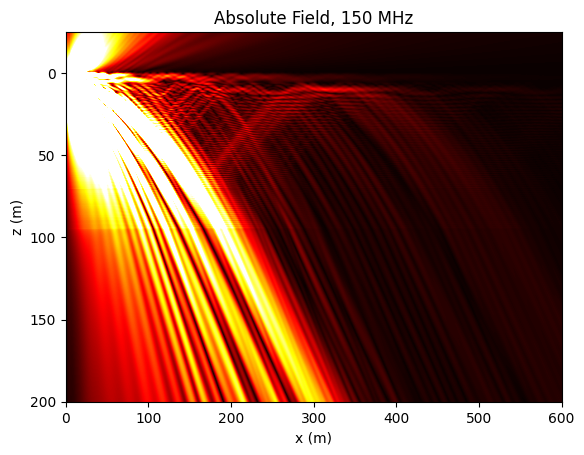

In [48]:
### plot absolute value of field for whole simulation space ###
fig = plt.figure()
ax = fig.add_subplot(111)

plt.imshow(np.transpose(abs(sim.get_field())), aspect='auto', cmap='hot',  vmin=1e-6, vmax=1e-3, 
          extent=(x[0], x[-1], z[-1], z[0]))
plt.title("Absolute Field, " + str(int(freq*1000))+" MHz")
plt.xlabel("x (m)")
plt.ylabel("z (m)")
plt.show()

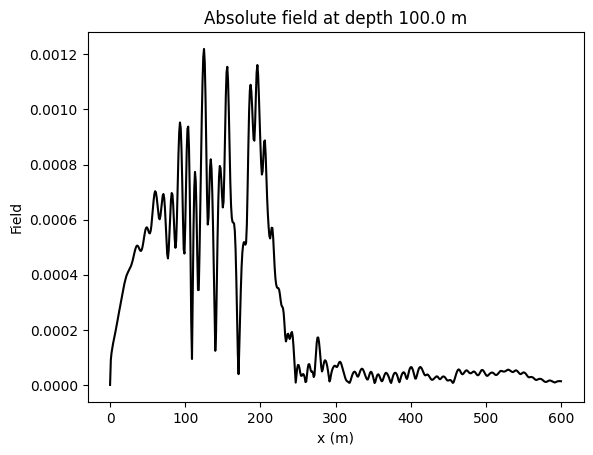

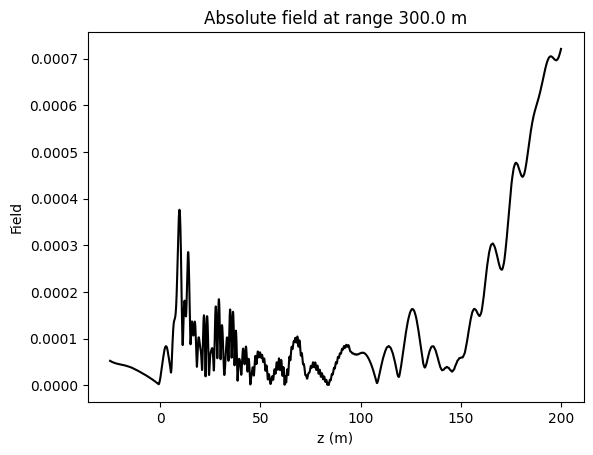

Absolute field at point (x0 = 300.0, z0 = 100.0): 6.845795521912203e-05


In [49]:
### plot absolute value of field for horizontal slice of simulation ###
z0 = 100.
plt.plot(x, abs(sim.get_field(z0=z0)), color='black')
plt.xlabel('x (m)')
plt.ylabel('Field')
plt.title("Absolute field at depth " + str(z0) + " m" )
plt.show()

### plot absolute value of field for vertical slice of simulation ###
x0 = 300.
plt.plot(z, abs(sim.get_field(x0=x0)), color='black')
plt.xlabel('z (m)')
plt.ylabel('Field')
plt.title("Absolute field at range " + str(x0) + " m" )
plt.show()

### value of field for at a single point (x0, z0) ###
print("Absolute field at point (x0 = " + str(x0) + ", z0 = " + str(z0) + "): " + str(abs(sim.get_field(x0=x0, z0=z0))))

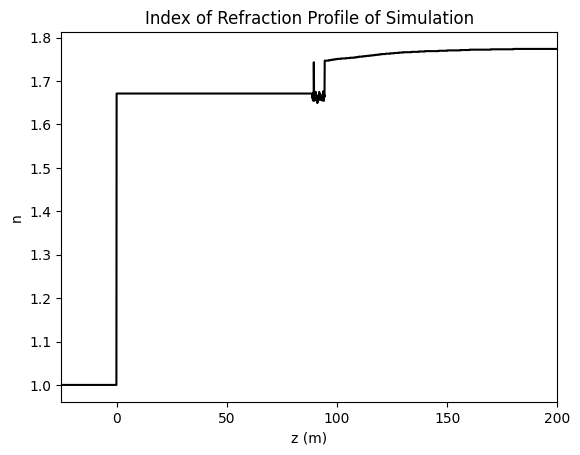

In [54]:
#neem and alley simulation with simulation same number of data points in a small range 
data = np.loadtxt("aNeem.txt")
depths = data[:, 0]
ref_indices = data[:, 1]
sim.set_n(nVec=ref_indices, zVec=depths)

# Plot the refractive index profile
z = sim.get_z()
plt.plot(z, sim.get_n()[:,0], color='black')
plt.ylabel('n')
plt.xlabel('z (m)')
plt.title('Index of Refraction Profile of Simulation')
plt.xlim(z[0], z[-1])
plt.show()

In [55]:
sim.do_solver()

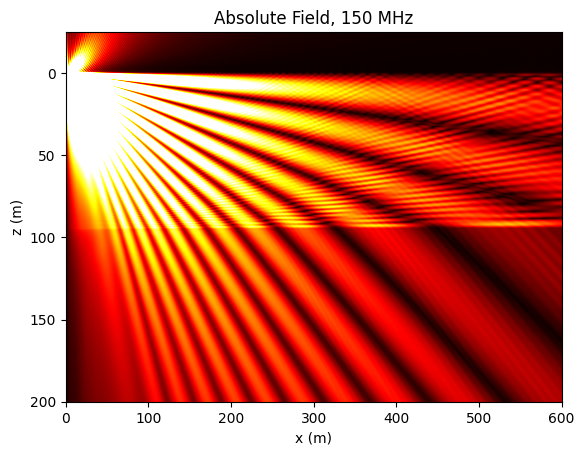

In [56]:
### plot absolute value of field for whole simulation space ###
fig = plt.figure()
ax = fig.add_subplot(111)

plt.imshow(np.transpose(abs(sim.get_field())), aspect='auto', cmap='hot',  vmin=1e-6, vmax=1e-3, 
          extent=(x[0], x[-1], z[-1], z[0]))
plt.title("Absolute Field, " + str(int(freq*1000))+" MHz")
plt.xlabel("x (m)")
plt.ylabel("z (m)")
plt.show()

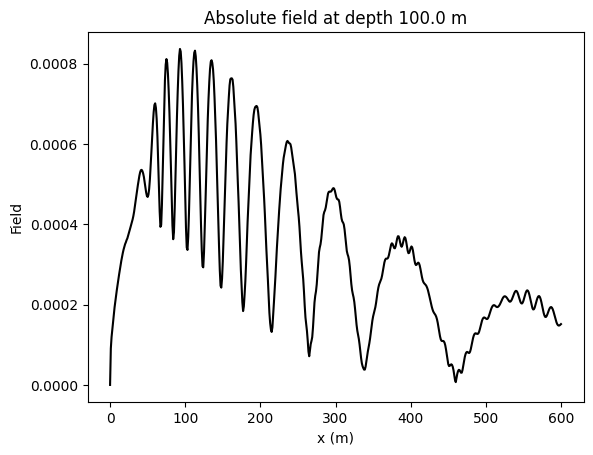

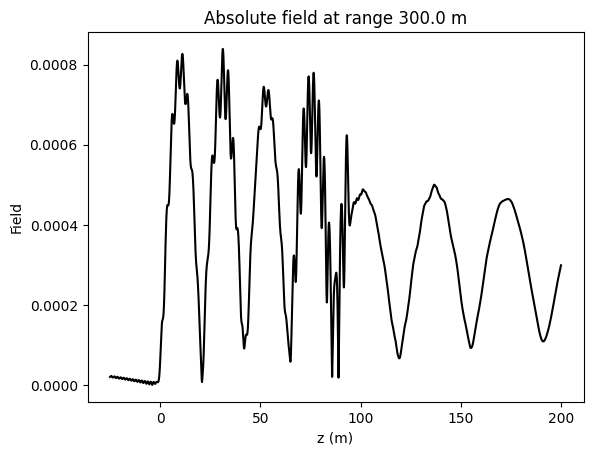

Absolute field at point (x0 = 300.0, z0 = 100.0): 0.0004755570311196255


In [57]:
### plot absolute value of field for horizontal slice of simulation ###
z0 = 100.
plt.plot(x, abs(sim.get_field(z0=z0)), color='black')
plt.xlabel('x (m)')
plt.ylabel('Field')
plt.title("Absolute field at depth " + str(z0) + " m" )
plt.show()

### plot absolute value of field for vertical slice of simulation ###
x0 = 300.
plt.plot(z, abs(sim.get_field(x0=x0)), color='black')
plt.xlabel('z (m)')
plt.ylabel('Field')
plt.title("Absolute field at range " + str(x0) + " m" )
plt.show()

### value of field for at a single point (x0, z0) ###
print("Absolute field at point (x0 = " + str(x0) + ", z0 = " + str(z0) + "): " + str(abs(sim.get_field(x0=x0, z0=z0))))

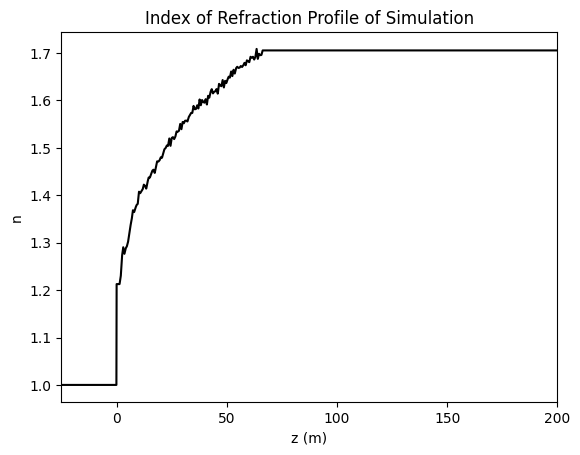

In [5]:
#Negis data, vallelonga
data= np.array(np.loadtxt("2012negisdata.txt"))



depths = data[:, 0]
ref_indices = data[:, 1]
sim.set_n(nVec=ref_indices, zVec=depths)

# Plot the refractive index profile
z = sim.get_z()
plt.plot(z, sim.get_n()[:,0], color='black')
plt.ylabel('n')
plt.xlabel('z (m)')
plt.title('Index of Refraction Profile of Simulation')
plt.xlim(z[0], z[-1])
plt.show()

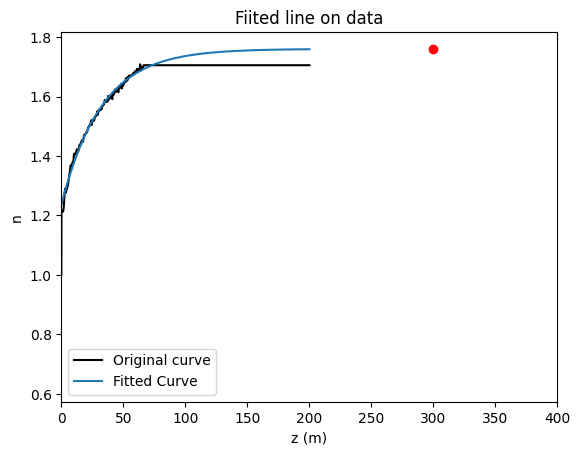

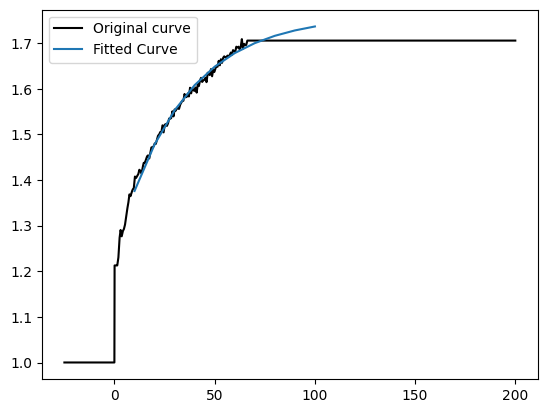

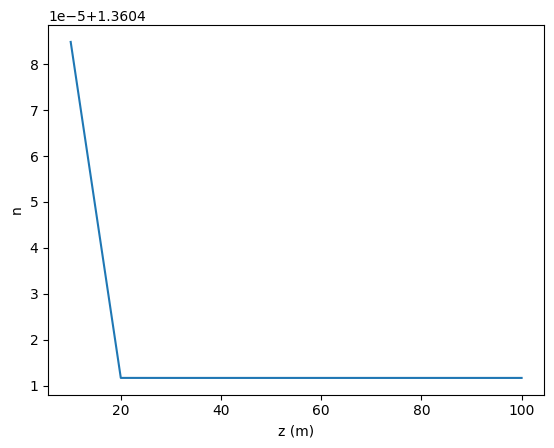

In [27]:
from scipy.optimize import curve_fit
import numpy as np

#function to fit data to
def func(z, a, b, c):
    return  (a) + b*(np.exp(-c*z))

data= np.array(np.loadtxt("2012negisdata.txt"))


depths = data[:, 0]
ref_indices = data[:, 1]
sim.set_n(nVec=ref_indices, zVec=depths)

#initial parameters, f is density and p0 is conversion to index of refraction
f= [0.4265227,0.54027386, -0.0119678] 
p0 = 1 + (0.845 * f[0]), 1 + (0.845 * f[1]),    1+ (0.845*f[2])



popt, pcov = curve_fit(func, depths, ref_indices, p0)
z = sim.get_z()

plt.plot(z, sim.get_n()[:,0], color='black', label ="Original curve")
plt.plot(z, func(z, *popt),  label="Fitted Curve")
plt.title("Fiited line on data")
plt.legend()
plt.ylabel('n')
plt.xlabel('z (m)')
for i in range(201, 301):
    nextz= i
plt.plot(300, func(300, *popt), "ro")
plt.xlim(0,400)
plt.show()

#wrong thing to do, what we actually want to do is put fake data into function
#then plot it, and see if the parameters match with the given parameters
#fake depth values to test function, depth in meters, 
m=[10,20,30,40,50,60,70,80,90,100]

fakez=np.array(m)
#plt.plot(fakez, func(fakez,*popt), color="red", label="fakefittedcurve")

#plt.plot(z, sim.get_n()[:,0], color='black', label ="Original curve")

fake_z = np.arange(1, 101)
plt.plot(z, sim.get_n()[:,0], color='black', label ="Original curve")
plt.plot(fakez, func(fakez, *popt),  label="Fitted Curve")
plt.legend()
plt.show()
plt.xlabel('z (m)')
#plt.plot(fake_z,func(fake_z, p0[0],p0[1],p0[2]))


plt.ylabel('n')
plt.xlabel('z (m)')
plt.plot(fakez,func(fakez, p0[0],p0[1],p0[2]))

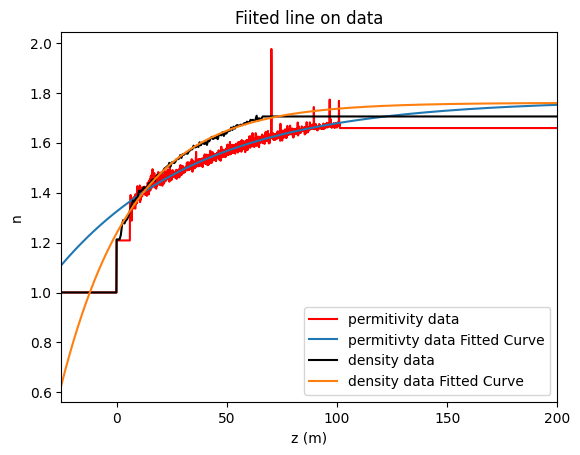

In [6]:
from scipy.optimize import curve_fit
import numpy as np

#function to fit data to
def func(z, a, b, c):
    return  (a) + b*(np.exp(-c*z))
#neem permitivity simulation
data1 = np.loadtxt("Neem.txt")
depths = data1[:, 0]
ref_indices = data1[:, 1]
sim.set_n(nVec=ref_indices, zVec=depths)
h = np.array([1.325,0.463, -0.0140]) #got these numbers from data fit of ice-index of refraction from south pole website
p1= h**2
# Plot the refractive index profile
popt, pcov = curve_fit(func, depths, ref_indices, p1)
z = sim.get_z()
plt.plot(z, sim.get_n()[:,0], color='red', label = "permitivity data")
plt.plot(z, func(z, *popt),  label="permitivty data Fitted Curve")
plt.ylabel('n')
plt.xlabel('z (m)')
plt.title('Index of Refraction Profile of Simulation')
plt.xlim(z[0], z[-1])




data= np.array(np.loadtxt("2012negisdata.txt"))


depths = data[:, 0]
ref_indices = data[:, 1]
sim.set_n(nVec=ref_indices, zVec=depths)

#initial parameters, f is density and p0 is conversion to index of refraction
f= [0.4265227,0.54027386, -0.0119678] 
p0 = 1 + (0.845 * f[0]), 1 + (0.845 * f[1]),    1+ (0.845*f[2])



popt, pcov = curve_fit(func, depths, ref_indices, p0)
z = sim.get_z()

plt.plot(z, sim.get_n()[:,0], color='black', label ="density data")
plt.plot(z, func(z, *popt),  label="density data Fitted Curve")

plt.title("Fiited line on data")
plt.legend()
plt.ylabel('n')
plt.xlabel('z (m)')


plt.show()

In [13]:
sim.do_solver()

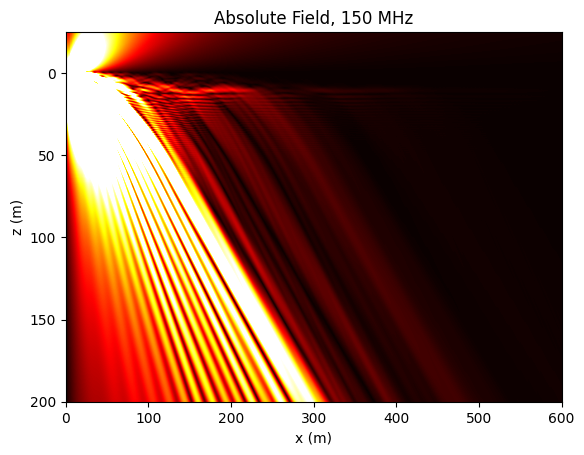

In [14]:
### plot absolute value of field for whole simulation space ###
fig = plt.figure()
ax = fig.add_subplot(111)

plt.imshow(np.transpose(abs(sim.get_field())), aspect='auto', cmap='hot',  vmin=1e-6, vmax=1e-3, 
          extent=(x[0], x[-1], z[-1], z[0]))
plt.title("Absolute Field, " + str(int(freq*1000))+" MHz")
plt.xlabel("x (m)")
plt.ylabel("z (m)")
plt.show()

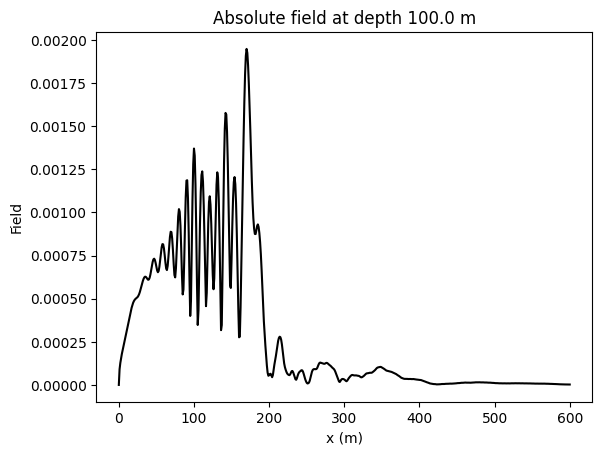

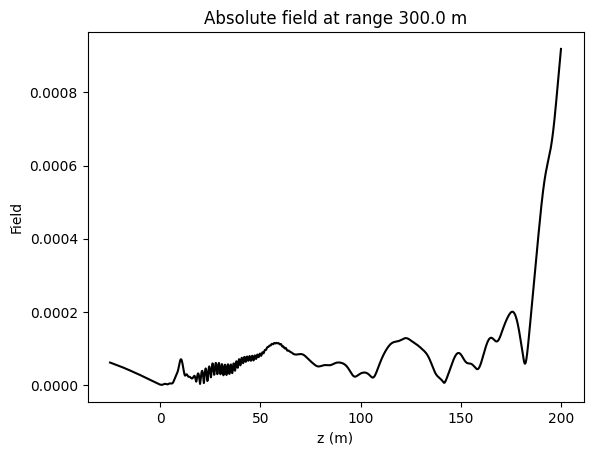

Absolute field at point (x0 = 300.0, z0 = 100.0): 3.145489224374215e-05


In [15]:
### plot absolute value of field for horizontal slice of simulation ###
z0 = 100.
plt.plot(x, abs(sim.get_field(z0=z0)), color='black')
plt.xlabel('x (m)')
plt.ylabel('Field')
plt.title("Absolute field at depth " + str(z0) + " m" )
plt.show()

### plot absolute value of field for vertical slice of simulation ###
x0 = 300.
plt.plot(z, abs(sim.get_field(x0=x0)), color='black')
plt.xlabel('z (m)')
plt.ylabel('Field')
plt.title("Absolute field at range " + str(x0) + " m" )
plt.show()

### value of field for at a single point (x0, z0) ###
print("Absolute field at point (x0 = " + str(x0) + ", z0 = " + str(z0) + "): " + str(abs(sim.get_field(x0=x0, z0=z0))))

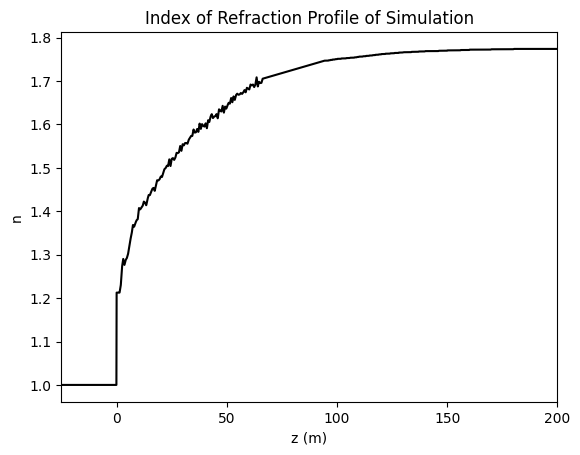

In [16]:
#Negisalley, combination of two data sets, both in greenland so should be fine to try simulating data together
data = np.loadtxt("Negisalley.txt")
depths = data[:, 0]
ref_indices = data[:, 1]
sim.set_n(nVec=ref_indices, zVec=depths)

# Plot the refractive index profile
z = sim.get_z()
plt.plot(z, sim.get_n()[:,0], color='black')
plt.ylabel('n')
plt.xlabel('z (m)')
plt.title('Index of Refraction Profile of Simulation')
plt.xlim(z[0], z[-1])
plt.show()

In [17]:
sim.do_solver()

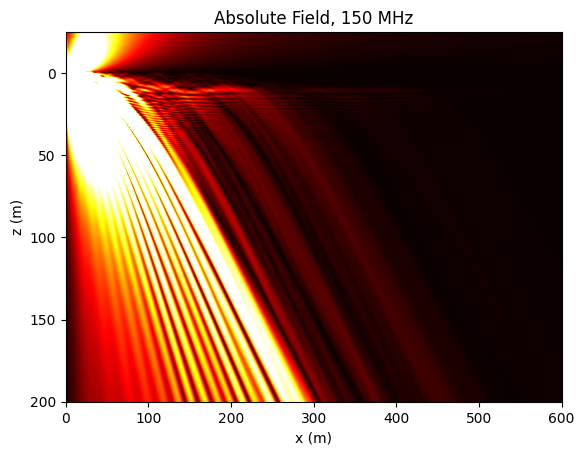

In [18]:
### plot absolute value of field for whole simulation space ###
fig = plt.figure()
ax = fig.add_subplot(111)

plt.imshow(np.transpose(abs(sim.get_field())), aspect='auto', cmap='hot',  vmin=1e-6, vmax=1e-3, 
          extent=(x[0], x[-1], z[-1], z[0]))
plt.title("Absolute Field, " + str(int(freq*1000))+" MHz")
plt.xlabel("x (m)")
plt.ylabel("z (m)")
plt.show()

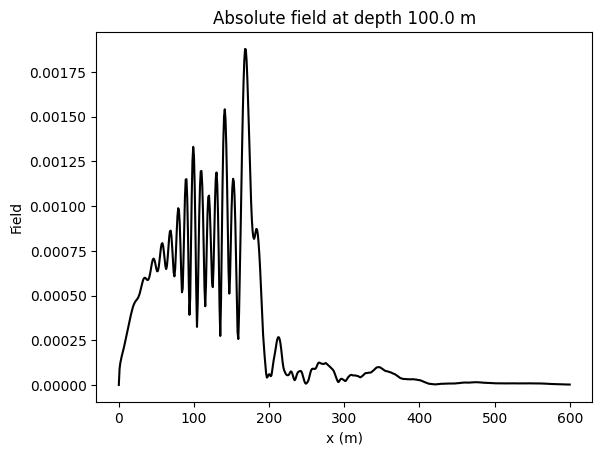

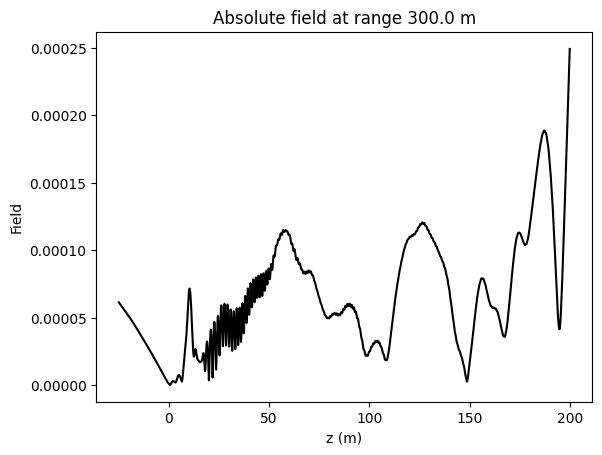

Absolute field at point (x0 = 300.0, z0 = 100.0): 2.5036191158725373e-05


In [19]:
### plot absolute value of field for horizontal slice of simulation ###
z0 = 100.
plt.plot(x, abs(sim.get_field(z0=z0)), color='black')
plt.xlabel('x (m)')
plt.ylabel('Field')
plt.title("Absolute field at depth " + str(z0) + " m" )
plt.show()

### plot absolute value of field for vertical slice of simulation ###
x0 = 300.
plt.plot(z, abs(sim.get_field(x0=x0)), color='black')
plt.xlabel('z (m)')
plt.ylabel('Field')
plt.title("Absolute field at range " + str(x0) + " m" )
plt.show()

### value of field for at a single point (x0, z0) ###
print("Absolute field at point (x0 = " + str(x0) + ", z0 = " + str(z0) + "): " + str(abs(sim.get_field(x0=x0, z0=z0))))